In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from wordcloud import WordCloud,ImageColorGenerator
import jieba
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 各互联网公司微博机构号对比

In [4]:
df = pd.read_excel('企业机构号数量.xlsx')
df.columns = ['company','number_of_accounts','most_followers']
df

,company,number_of_accounts,most_followers
0,腾讯,79,1543
1,网易,71,1618
2,百度,57,434
3,滴滴,13,331
4,美团,6,354
5,京东,63,561
6,小米,31,2849
7,华为,29,2408
8,阿里,104,167


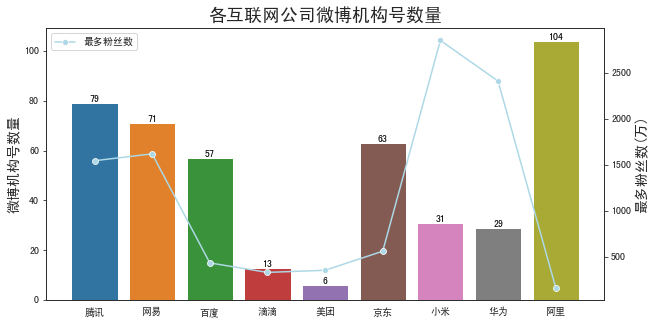

In [180]:
sns.set_style("white")
plt.rcParams['font.sans-serif']=['SimHei']
fig,ax = plt.subplots(figsize=(10,5))
ax1 = sns.barplot(data=df,x='company',y='number_of_accounts')

ax1.set_title('各互联网公司微博机构号数量',fontsize=18)
ax1.set_xlabel('',fontsize=14)
ax1.set_ylabel('微博机构号数量',fontsize=14)

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df,x='company',y='most_followers',color='lightblue',marker='o',label='最多粉丝数')
ax2.legend(loc='upper left')
ax2.set_ylabel('最多粉丝数(万)',fontsize=14)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## 腾讯各机构号表现

### 腾讯机构号基本数据对比

In [6]:
acct = pd.read_excel('users.csv')

In [7]:
acct.columns

Index(['用户id', '昵称', '性别', '生日', '所在地', '微博数', '粉丝数', '关注数', '简介', '主页', '头像',
       '高清头像', '微博等级', '会员等级', '是否认证', '认证类型', '认证信息'],
      dtype='object')

In [8]:
acct = acct.loc[:,['用户id', '昵称',  '微博数', '粉丝数', '关注数', '微博等级', '会员等级', '认证类型', '认证信息']]

In [9]:
acct

,用户id,昵称,微博数,粉丝数,关注数,微博等级,会员等级,认证类型,认证信息
0,1846456085,腾讯公司,1229,825597,198,31,6,2,腾讯公司官方微博
1,2591595652,腾讯视频,98542,14529401,3202,48,7,3,腾讯视频官方微博
2,1930378853,腾讯微信团队,1214,576422,45,16,6,2,腾讯微信官方微博
3,3758512144,腾讯综艺,40977,4191025,1717,48,6,3,腾讯视频综艺频道官方微博
4,6479255096,腾讯微视,14797,1842358,1388,29,6,2,腾讯微视APP官方微博
...,...,...,...,...,...,...,...,...,...
74,2671991533,腾讯QQ安全中心,770,21860,110,17,1,2,腾讯QQ安全中心官方微博
75,6279793619,腾讯财经,8164,15679,426,9,0,3,腾讯科技（北京）有限公司
76,6461143362,腾讯医疗健康,401,17139,42,4,0,2,腾讯医疗健康官方微博
77,6933870699,腾讯艺术,1267,17453,356,12,4,2,腾讯视频艺术频道官方微博


In [10]:
path = 'weibo/'
filedir = listdir(path)

In [11]:
ids = []
for i in range(len(filedir)):
    df1 = pd.read_csv(path+filedir[i],index_col=False,encoding='utf-8')
    # 近一个月内发布微博数量小于10，视为不活跃账号
    if len(df1) > 10:
        ids.append(filedir[i][:-4])
        if len(df1.columns) in [11,12]:
            if len(df1.columns) == 12:
                df2 = df1.iloc[:,[0,1,2,5,6,7,8,9,10,11]]
                df2.columns = ['id','bid','正文','日期','工具','点赞数','评论数','转发数','话题','@用户']
            else:
                df2 = df1.iloc[:,[0,1,2,5,6,7,8,9,10]]
                df2.columns = ['id','bid','正文','日期','工具','点赞数','评论数','转发数','话题']
            #df2.to_csv(r'/Users/kristallqiu/Desktop/Tencent/weibo1/'+filedir[i],index=False,encoding="utf_8_sig")
print(len(ids),ids)

45 ['6011462323', '1773148625', '6383393911', '6524337592', '7153909610', '6510949403', '2806170583', '3858896842', '3861674840', '6315195154', '3159220202', '1763084680', '5688848952', '6426064539', '6479255096', '6457832661', '3604205173', '6933870699', '3752699924', '5281774279', '5893886126', '6355984955', '5237654004', '6534736496', '6502440388', '5203786516', '3182423937', '6062063357', '2591595652', '2812307657', '5582522936', '5685400200', '5178832047', '3889146127', '6401074009', '3758512144', '5885931990', '5977015783', '6160862917', '2508053484', '2381461594', '1930378853', '6366315986', '7387497037', '5033584457']


In [12]:
# 近一个月内活跃(微博数>10)机构号数据列表
active_acct = acct.loc[acct['用户id'].isin(ids),:]
active_acct

,用户id,昵称,微博数,粉丝数,关注数,微博等级,会员等级,认证类型,认证信息
1,2591595652,腾讯视频,98542,14529401,3202,48,7,3,腾讯视频官方微博
2,1930378853,腾讯微信团队,1214,576422,45,16,6,2,腾讯微信官方微博
3,3758512144,腾讯综艺,40977,4191025,1717,48,6,3,腾讯视频综艺频道官方微博
4,6479255096,腾讯微视,14797,1842358,1388,29,6,2,腾讯微视APP官方微博
5,3752699924,腾讯电视剧,25721,1659629,600,48,7,3,腾讯视频电视剧频道官方微博
6,1763084680,腾讯新闻出品,8098,600345,317,38,6,2,腾讯新闻出品
7,5203786516,腾讯动漫,15783,1221702,877,46,6,2,腾讯科技(北京)有限公司
8,2806170583,腾讯新闻,19531,662430,406,39,0,2,腾讯新闻官方账号
9,6426064539,腾讯视频娱乐,14538,724004,785,28,6,3,腾讯视频娱乐官方微博
10,3182423937,腾讯娱乐,10206,531222,1480,43,6,3,腾讯娱乐官方微博


Text(0, 0.5, '粉丝数(千万)')

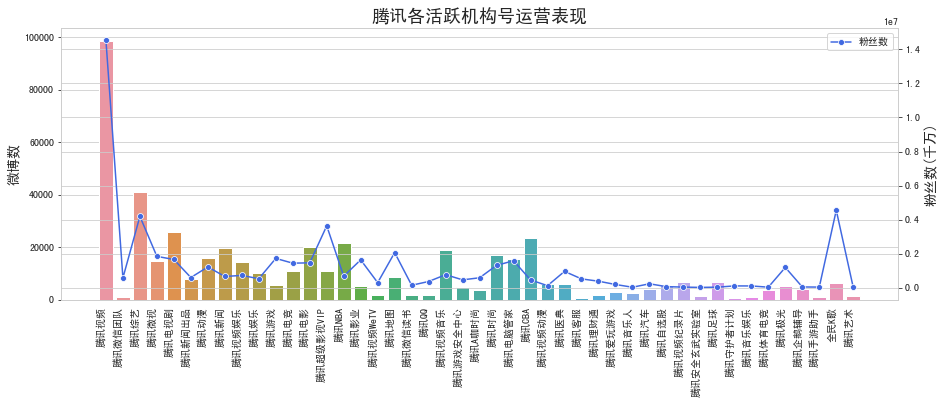

In [76]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif']=['SimHei']
fig,ax = plt.subplots(figsize=(15,5))

ax1 = sns.barplot(data=active_acct,x='昵称',y='微博数')
ax1.set_xlabel('')
ax.set_ylabel('微博数',fontsize=14)
ax1.set_title('腾讯各活跃机构号运营表现',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=active_acct,x='昵称',y='粉丝数',label='粉丝数',color='royalblue',marker='o')
ax2.set_ylabel('粉丝数(千万)',fontsize=14)

<ipython-input-14-8ffa29efa283>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_acct1['运营效率(粉丝数/微博数)'] = active_acct1['粉丝数']/active_acct1['微博数']


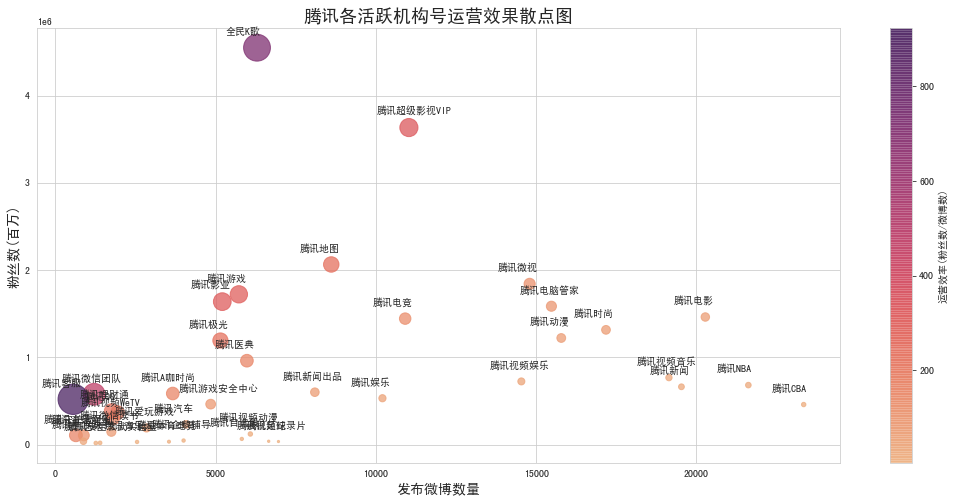

In [14]:
cmap = plt.cm.coolwarm
n = mpl.colors.Normalize()
# 腾讯视频、腾讯综艺、腾讯电视剧因机构性质发布微博数量极多，遂在作图中排除
active_acct1 = active_acct.loc[active_acct['微博数']<=25000,:]
active_acct1['运营效率(粉丝数/微博数)'] = active_acct1['粉丝数']/active_acct1['微博数']
fig,ax = plt.subplots(figsize=(18,8))
active_acct1.plot(ax=ax, kind='scatter', x='微博数',y='粉丝数', label='粉丝数/微博数',c='运营效率(粉丝数/微博数)',
                  s='运营效率(粉丝数/微博数)',cmap='flare', alpha=0.75, colorbar=True, legend=False)
ax.set_xlabel('发布微博数量',fontsize=14)
ax.set_ylabel('粉丝数(百万)',fontsize=14)
ax.set_title('腾讯各活跃机构号运营效果散点图',fontsize=18)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                ha='center', va='bottom',color= 'black')
for i, point in active_acct1.iterrows():
    ax.text(point['微博数']-1000, point['粉丝数']+150000, str(point['昵称']))

## 机构号整体表现

In [18]:
# 整合所有账号发布微博
allweibo = pd.read_csv(path+filedir[0])
for i in range(1,len(filedir)):
    w = pd.read_csv(path+filedir[i])
    allweibo = pd.concat([allweibo,w])
#allweibo.to_csv('all_weibo.csv',index=False,encoding="utf_8_sig")

Text(0, 0.5, '点赞数(千万)')

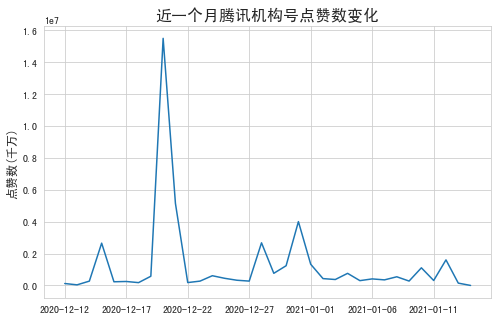

In [19]:
fig,ax = plt.subplots(figsize=[8,5])
allweibo.loc[:,['日期','点赞数']].groupby(['日期']).sum('点赞数').plot(ax=ax,legend=False)
ax.set_title('近一个月腾讯机构号点赞数变化',fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('点赞数(千万)',fontsize=12)

##### 其中峰值出现在 2020年12月20日，总点赞数达到15506289。出现峰值原因是由于当日举行腾讯星光大赏，40余条微博更新一众明星参与情况，引来无数点赞。

Text(0.5, 0, '')

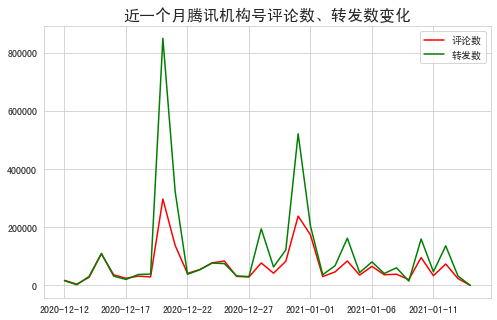

In [20]:
fig,ax = plt.subplots(figsize=[8,5])
allweibo.loc[:,['日期','评论数']].groupby(['日期']).sum('评论数').plot(ax=ax,color='r')
allweibo.loc[:,['日期','转发数']].groupby(['日期']).sum('转发数').plot(ax=ax,color='g')
ax.set_title('近一个月腾讯机构号评论数、转发数变化',fontsize=16)
ax.set_xlabel('')

In [21]:
# 所有发布话题
topics = []
for i in allweibo['话题'].values:
    topics += str(i).split(',')
while 'nan' in topics:
    topics.remove('nan')

In [22]:
likes,comments,reposts = [],[],[]    
all_weibo_adj = allweibo.dropna(subset=['话题'])
for t in topics:
    data = all_weibo_adj.loc[all_weibo_adj['话题'].str.contains(t),['点赞数','评论数','转发数']]
    likes.append(data['点赞数'].sum())
    comments.append(data['评论数'].sum())
    reposts.append(data['转发数'].sum())

In [23]:
all_topics = pd.DataFrame(data = {'topic':topics,'likes':likes,'comments':comments,'reposts':reposts})
# index 4427对应话题格式存在问题: '，天王' -> '天王'
all_topics['topic'][4427] = '天王'
#all_topics.to_csv('all_topics.csv',encoding="utf_8_sig",index=False)

<ipython-input-23-daa7eb413ee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_topics['topic'][4427] = '天王'


In [24]:
topic_count = all_topics.copy()
topic_count['count'] = [1 for i in range(len(topic_count))]
# 对应话题与发布微博数量
topic_count = topic_count.groupby(['topic','likes','comments','reposts']).sum('count')
topic_count = topic_count.reset_index()
# TOP 20 话题
topic_count.sort_values('count',ascending=False).head(20)

,topic,likes,comments,reposts,count
243,CBA联赛,61600.0,9518.0,3370.0,954
5807,鹅娘星光,371733.0,40639.0,68884.0,440
4708,腾讯视频星光大赏,17899286.0,285614.0,847256.0,408
241,CBA真香,13422.0,1914.0,699.0,245
4709,腾讯视频星光日,2278495.0,64492.0,57049.0,219
4662,腾讯娱乐年度盛典,3303861.0,199740.0,353733.0,211
495,cba红包飞,8341.0,1249.0,371.0,199
2728,敲娱的星鲜事,152816.0,16689.0,26379.0,194
2861,星光大赏,21112127.0,380606.0,981633.0,194
3718,湖南卫视跨年,683075.0,65688.0,94058.0,183


##### 其中发布数量较多的话题基本集中在娱乐、体育板块

In [77]:
topic_count.to_csv('all_topics_count.csv',encoding="utf_8_sig",index=False)

In [86]:
all_topics_count = pd.read_excel('all_topics_count.xlsx')
all_topics_count

,topic,likes,comments,reposts,count,type,type-detail
0,00后最流行的表白词是吹晚风,125,39,3,1,社会热点,NaN
1,0112大鹏生日快乐,5,1,1,1,娱乐,明星
2,1022-比尔的歌,1603,178,26,2,NaN,NaN
3,10岁女孩卖百香果遭奸杀案现新证词,5,6,3,1,社会热点,时事新闻
4,10岁患癌男孩试图拔输液管放弃治疗,2,0,0,1,社会热点,时事新闻
...,...,...,...,...,...,...,...
5945,黛西·雷德利,13,7,0,1,NaN,NaN
5946,鼻炎患者的真实写照,9,1,3,2,NaN,NaN
5947,齐麟当选CBA周最佳球员,18,5,1,1,体育,NaN
5948,龙丹妮对杨幂飞吻,18,5,1,1,NaN,NaN


In [101]:
# 随机选择3000个话题进行详细分类，其余话题（讨论性质、日常性质居多）作为其他
#all_topics_count = all_topics_count.fillna(value={'type':'其他'})
topic_cats = all_topics_count.groupby(['type']).sum('count')
topic_cats 

,likes,comments,reposts,count
type,,,,
体育,158055,25419,10739,1772
其他,51523453,2350621,4088278,10875
娱乐,69441414,3091234,6189627,7555
游戏电竞,38998,12517,14005,301
社会热点,182192,24167,39134,507
科技,104,142,141,15
腾讯,189251,16001,77096,146


In [182]:
all_topics_count.groupby(['type','type-detail']).sum('count')

likes  comments  reposts  count
type type-detail                                    
其他   明星                 28         3       13      7
娱乐   影视            3922255    373492   681539   2231
     时尚               1198       159       68      7
     明星           10753699   1004701  2001352   2994
     晚会            1405036     31771   113997     69
     热点               4611      1101      459     56
     热点话题               22         4        2      3
     节目             493498     33948    25273    194
     跨年相关         15943795    966406  1669192   1174
     音乐               5361       464      240     20
社会热点 人物               3134       303      726      7
     时事新闻               18         7        5      4
     疫情             163856     20574    31328    427
     跨年相关             2443      1693     2061     16

In [106]:
all_topics_count.describe()

,likes,comments,reposts,count
count,5.950000e+03,5950.000000,5950.000000,5950.000000
mean,2.042579e+04,927.748067,1751.095798,3.558151
std,3.951244e+05,9705.494923,21842.107145,18.319980
min,0.000000e+00,0.000000,0.000000,1.000000
25%,7.000000e+00,2.000000,1.000000,1.000000
50%,7.750000e+01,25.000000,8.000000,1.000000
75%,1.163500e+03,208.000000,162.000000,2.000000
max,2.111213e+07,411790.000000,981633.000000,954.000000


In [155]:
alltpcs['count'].quantile(0.99)

34.8400000000006

Text(0.5, 0, '相关微博数')

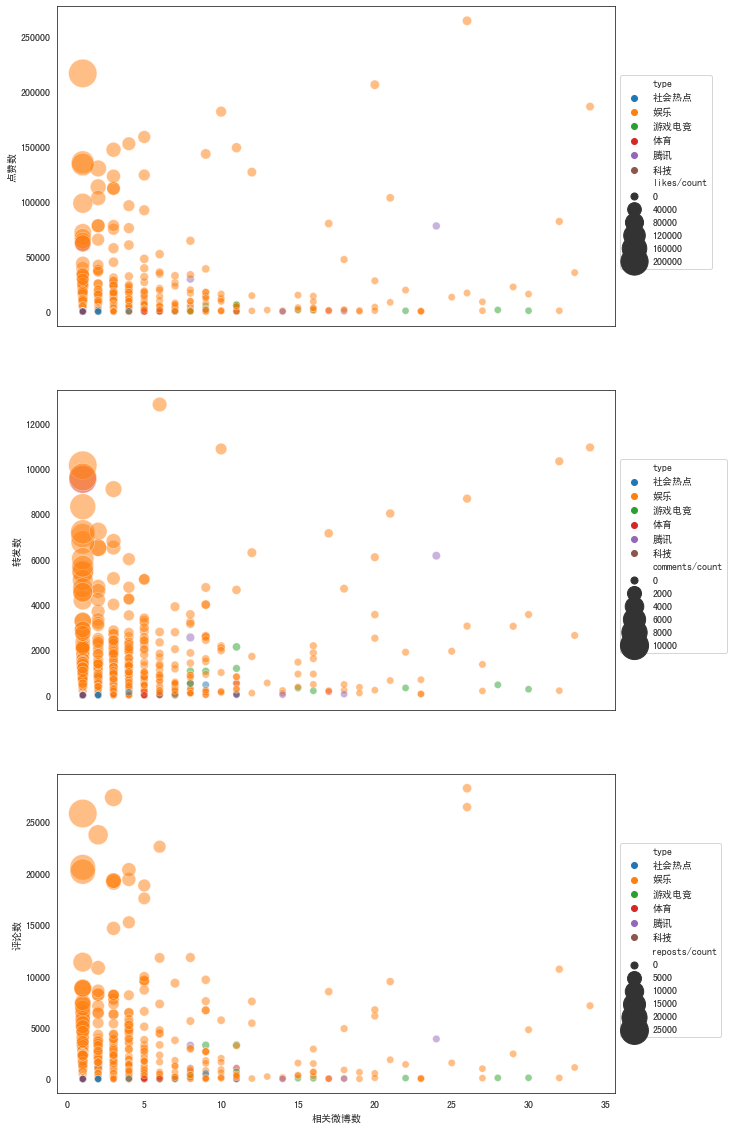

In [211]:
alltpcs = all_topics_count.loc[(all_topics_count['type']!='其他'),:]
alltpcs = alltpcs.loc[(alltpcs['count']<=alltpcs['count'].quantile(0.99))&
                     (alltpcs['likes']<=alltpcs['likes'].quantile(0.99))&
                     (alltpcs['comments']<=alltpcs['comments'].quantile(0.99))&
                      (alltpcs['reposts']<=alltpcs['reposts'].quantile(0.99)),:]
alltpcs['likes/count'] = alltpcs['likes'] / alltpcs['count']
alltpcs['comments/count'] = alltpcs['comments'] / alltpcs['count']
alltpcs['reposts/count'] = alltpcs['reposts'] / alltpcs['count']
fig,ax = plt.subplots(3,sharex=True,figsize=(10,20))
sns.scatterplot(ax=ax[0],data=alltpcs,x='count',y='likes',hue='type',alpha=0.5,
                     size='likes/count',sizes=(50,800),palette='tab10')
ax[0].legend(bbox_to_anchor=(1,0.8))
ax[0].set_ylabel('点赞数')
sns.scatterplot(ax=ax[1],data=alltpcs,x='count',y='comments',hue='type',alpha=0.5,
                     size='comments/count',sizes=(50,800),palette='tab10')
ax[1].legend(bbox_to_anchor=(1,0.8))
ax[1].set_ylabel('转发数')
sns.scatterplot(ax=ax[2],data=alltpcs,x='count',y='reposts',hue='type',alpha=0.5,
                     size='reposts/count',sizes=(50,800),palette='tab10')
ax[2].legend(bbox_to_anchor=(1,0.8))
ax[2].set_ylabel('评论数')
ax[2].set_xlabel('相关微博数')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lv/snv97l992c5ctbbxj96wt76w0000gn/T/jieba.cache
Loading model cost 0.790 seconds.
Prefix dict has been built successfully.


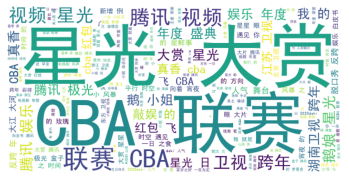

In [25]:
# 话题词频分析
cut_text = jieba.lcut(''.join(all_topics['topic']))
result = " ".join(cut_text)
wc = WordCloud(font_path='SimHei.ttf',background_color='white',scale=1.5).generate(result)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [61]:
def segment_words(text):
    contents = ""
    words = jieba.cut(text,cut_all=False)
    for w in words:
        #使用空格来分割词
        contents += w + ' '
    return contents

# 创建停用词
def get_stopwords(file):
    sw = set()
    f = open(file,'r',encoding="utf-8")
    line_contents = f.readline()
    while line_contents:
        line_contents = line_contents.replace("\n","").replace("\t","").replace("\u3000","")
        sw.add(line_contents)
        line_contents = f.readline()
    return sw

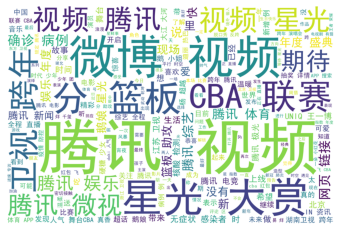

In [72]:
#对文本进行分词
text = segment_words(''.join(allweibo['正文']))
#获取停用词
sw = get_stopwords('cn_stopwords.txt')
#创建词云
wc = WordCloud(font_path='SimHei.ttf',width=1200,height=800,background_color="white",
            stopwords=sw).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('weibo词频分析.png')

##### 腾讯视频等视频类机构号发布微博数量过多，导致词频较高。

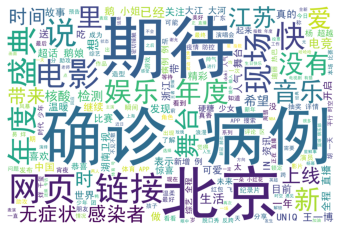

In [75]:
sw1 = set(list(sw)+['腾讯','视频','微博','篮板','星光','大赏','CBA','联赛','卫视','跨年','微视'])
wc = WordCloud(font_path='SimHei.ttf',width=1200,height=800,background_color="white",
            stopwords=sw1).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('weibo词频分析_过滤.png')